In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [43]:
df=pd.read_csv('Datasets/iris.csv')

In [44]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [45]:

df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [46]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [47]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [48]:
df.loc[df.Species==0,'Species']='Setosa'

In [49]:
df.loc[df.Species==1,'Species']='Versicolor'
df.loc[df.Species==2,'Species']='Verginica'

In [50]:
df.Species.unique()

array(['Setosa', 'Versicolor', 'Verginica'], dtype=object)

In [51]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [52]:

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:

df.describe(include='O')

,Species
count,150
unique,3
top,Verginica
freq,50


In [55]:

x=df.iloc[:,:-1]
y=df.Species

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [57]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_predict=model.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [60]:
accuracy_score(y_test,y_predict)

0.9777777777777777

In [61]:
confusion_matrix(y_test,y_predict)

array([[17,  0,  0],
       [ 0, 16,  0],
       [ 1,  0, 11]], dtype=int64)

<AxesSubplot:>

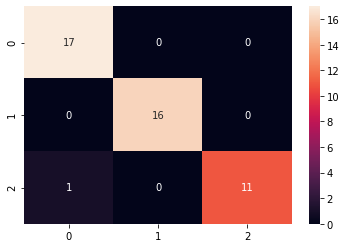

In [62]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      Setosa       0.94      1.00      0.97        17
   Verginica       1.00      1.00      1.00        16
  Versicolor       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



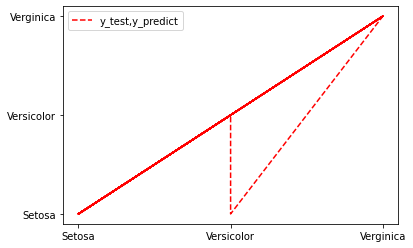

In [71]:
plt.plot(y_test,y_predict,color='red',ls='dashed')
plt.legend(['y_test,y_predict'])

<AxesSubplot:xlabel='Species'>

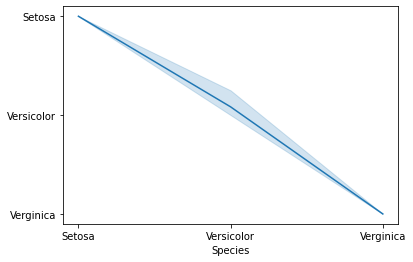

In [72]:
sns.lineplot(x=y_test,y=y_predict)

<AxesSubplot:xlabel='Species'>

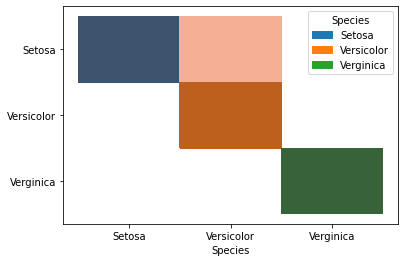

In [80]:
sns.histplot(x=y_test,y=y_predict,hue=y_test,stat='count')